In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.optimize import minimize

# Non Linear Regression - Iterative Estimation & Linear Approximations

(Bates and Watts, 1988, p. 55)

Data on the reaction rate of the catalytic isomerization of n-pentane to isopentane versus the partial pressures of hydrogen, n-pentane, and isopentane

In [2]:
df = pd.DataFrame()

# partial pressure of hydrogen, n-pentane and isopentane in (psia)
df['p_hydrogen'] = [205.8, 404.8, 209.7, 401.6, 224.9, 402.6, 212.7, 406.2, 133.3, 470.9, 300.0, 
                    301.6, 297.3, 314.0, 305.7, 300.1, 305.4, 305.2, 300.1, 106.6, 417.2, 251.0, 250.3, 145.1]

df['p_n_pentane'] = [90.9, 92.9, 174.9, 187.2, 92.7, 102.2, 186.9, 192.6, 140.8, 144.2, 68.3, 214.6, 142.2, 146.7,
                    142.0, 143.7, 141.1, 141.5, 83.0, 209.6, 83.9, 294.4, 148.0, 291.0]

df['isopentane'] = [37.1, 36.3, 49.4, 44.9, 116.3, 128.9, 134.4, 134.9, 87.6, 86.9, 81.7, 101.7, 10.5, 157.1,
                   86.0, 90.2, 87.4, 87.0, 66.4, 33.0, 32.9, 41.5, 14.7, 50.2]

# reaction rate in (hr^-1)
df['reaction_rate'] = [3.541, 2.397, 6.694, 4.722, 0.593, 0.268, 2.797, 2.451, 3.196, 2.021, 0.896, 5.084, 5.686,
                      1.193, 2.648, 3.303, 3.054, 3.302, 1.271, 11.648, 2.002, 9.604, 7.754, 11.590]

In [3]:
df

,p_hydrogen,p_n_pentane,isopentane,reaction_rate
0,205.8,90.9,37.1,3.541
1,404.8,92.9,36.3,2.397
2,209.7,174.9,49.4,6.694
3,401.6,187.2,44.9,4.722
4,224.9,92.7,116.3,0.593
5,402.6,102.2,128.9,0.268
6,212.7,186.9,134.4,2.797
7,406.2,192.6,134.9,2.451
8,133.3,140.8,87.6,3.196
9,470.9,144.2,86.9,2.021


In [4]:
y_obs = df['reaction_rate'].T.values
y_obs

array([ 3.541,  2.397,  6.694,  4.722,  0.593,  0.268,  2.797,  2.451,
        3.196,  2.021,  0.896,  5.084,  5.686,  1.193,  2.648,  3.303,
        3.054,  3.302,  1.271, 11.648,  2.002,  9.604,  7.754, 11.59 ])

In [5]:
# regressor to predict a response variable
regressor = df.iloc[:, 1:].T.values
regressor

array([[9.0900e+01, 9.2900e+01, 1.7490e+02, 1.8720e+02, 9.2700e+01,
        1.0220e+02, 1.8690e+02, 1.9260e+02, 1.4080e+02, 1.4420e+02,
        6.8300e+01, 2.1460e+02, 1.4220e+02, 1.4670e+02, 1.4200e+02,
        1.4370e+02, 1.4110e+02, 1.4150e+02, 8.3000e+01, 2.0960e+02,
        8.3900e+01, 2.9440e+02, 1.4800e+02, 2.9100e+02],
       [3.7100e+01, 3.6300e+01, 4.9400e+01, 4.4900e+01, 1.1630e+02,
        1.2890e+02, 1.3440e+02, 1.3490e+02, 8.7600e+01, 8.6900e+01,
        8.1700e+01, 1.0170e+02, 1.0500e+01, 1.5710e+02, 8.6000e+01,
        9.0200e+01, 8.7400e+01, 8.7000e+01, 6.6400e+01, 3.3000e+01,
        3.2900e+01, 4.1500e+01, 1.4700e+01, 5.0200e+01],
       [3.5410e+00, 2.3970e+00, 6.6940e+00, 4.7220e+00, 5.9300e-01,
        2.6800e-01, 2.7970e+00, 2.4510e+00, 3.1960e+00, 2.0210e+00,
        8.9600e-01, 5.0840e+00, 5.6860e+00, 1.1930e+00, 2.6480e+00,
        3.3030e+00, 3.0540e+00, 3.3020e+00, 1.2710e+00, 1.1648e+01,
        2.0020e+00, 9.6040e+00, 7.7540e+00, 1.1590e+01]])

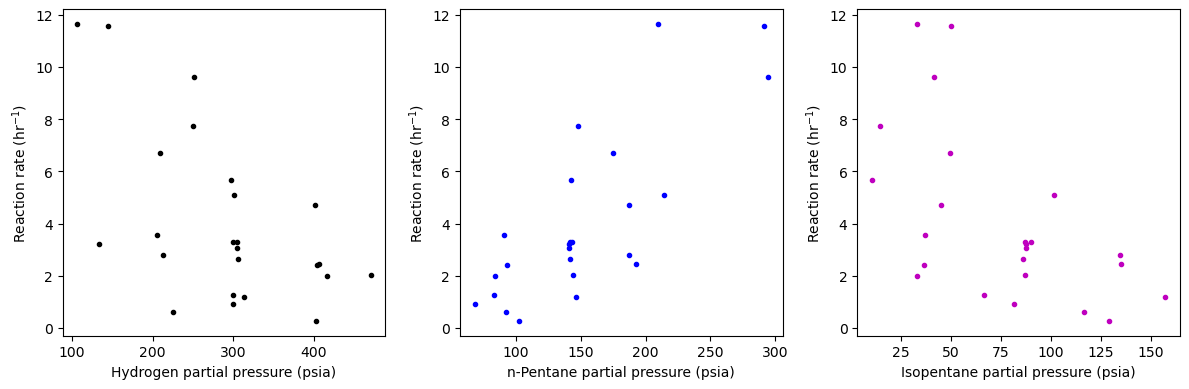

In [6]:
fig, ax = plt.subplots(ncols = 3, figsize = (12, 4))

ax[0].plot(df['p_hydrogen'], df['reaction_rate'], 'k.')
ax[0].set_xlabel('Hydrogen partial pressure (psia)')
ax[0].set_ylabel('Reaction rate (hr$^{-1}$)')

ax[1].plot(df['p_n_pentane'], df['reaction_rate'], 'b.')
ax[1].set_xlabel('n-Pentane partial pressure (psia)')
ax[1].set_ylabel('Reaction rate (hr$^{-1}$)')

ax[2].plot(df['isopentane'], df['reaction_rate'], 'm.')
ax[2].set_xlabel('Isopentane partial pressure (psia)')
ax[2].set_ylabel('Reaction rate (hr$^{-1}$)')

fig.tight_layout()

A proposed model for this data is

$f(x, \theta) = \frac{\theta_1\theta_3(x_2-x_3/1.632)}{1+\theta_2x_1+\theta_3x_2+\theta_4x_3}$

In [7]:
def calc_y(x, a, b, c, d):
    
    num = a*c*(x[1] - x[2]/1.632)
    denom = 1+b*x[0]+c*x[1]+d*x[2]
    y = num/denom 
    
    return y

# test functionality of calc_y
calc_y(regressor, 1, 1, 1, 1)

array([0.26354313, 0.26268505, 0.19525628, 0.1766305 , 0.55052467,
       0.55401684, 0.40814327, 0.40307526, 0.36819922, 0.3658862 ,
       0.53425357, 0.30579931, 0.04401849, 0.51102148, 0.36424856,
       0.37017209, 0.36777986, 0.36501712, 0.4326549 , 0.10132399,
       0.26438026, 0.10278437, 0.05802591, 0.12181883])

### use "lmfit"

In [8]:
my_model = Model(calc_y)

# set the boundries for each parameter
# my_model.set_param_hint('a', min= 0.5, max=200)
# my_model.set_param_hint('b', min=-0.5, max=1)
# my_model.set_param_hint('c', min=-0.5, max=1)
# my_model.set_param_hint('d', min= -0.5, max=10)

# initial values
result = my_model.fit(y_obs, x=regressor, a=0.1, b=0.1, c=0.1, d=0.1)

print(result.fit_report())

[[Model]]
    Model(calc_y)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 139
    # data points      = 24
    # variables        = 4
    chi-square         = 45.6987332
    reduced chi-square = 2.28493666
    Akaike info crit   = 23.4564019
    Bayesian info crit = 28.1686173
[[Variables]]
    a:  3.03125471 +/- 0.37234177 (12.28%) (init = 0.1)
    b: -0.00503665 +/- 6.9499e-04 (13.80%) (init = 0.1)
    c:  0.04432949 +/- 0.00416243 (9.39%) (init = 0.1)
    d: -0.09580068 +/- 0.01111612 (11.60%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, d) = -0.737
    C(b, c) = -0.523
    C(a, b) = 0.408
    C(a, d) = -0.235
    C(c, d) = -0.114


In [9]:
best_values = np.array(list(result.best_values.values()))
best_fit = result.best_fit

**Studentized residual** is a statistical term and it is defined as the quotient obtained by dividing a residual by its estimated standard deviation. This is a crucial technique used in the detection of outlines. Practically, one can claim that any type of observation in a dataset having a studentized residual of more than 3 (absolute value) is an outlier. 

In [10]:
# X: regressor, Y: response variable
def internally_studentized_residual(X, Y):
    
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)
    
    diff_mean_sqr = np.dot((X - mean_X), (X - mean_X))
    
    beta1 = np.dot((X - mean_X), (Y - mean_Y)) / diff_mean_sqr
    beta0 = mean_Y - beta1 * mean_X
    
    y_hat = beta0 + beta1 * X
    residuals = Y - y_hat
    
    h_ii = (X - mean_X) ** 2 / diff_mean_sqr + (1 / n)
    Var_e = np.sqrt(sum((Y - y_hat) ** 2)/(n-2))
    SE_regression = Var_e*((1-h_ii) ** 0.5)
    studentized_residuals = residuals/SE_regression
    
    return studentized_residuals

In [11]:
residual_p_hydrogen = internally_studentized_residual(df["p_hydrogen"], df['reaction_rate'])
residual_p_n_pentane = internally_studentized_residual(df["p_n_pentane"], df['reaction_rate'])
residual_isopentane = internally_studentized_residual(df["isopentane"], df['reaction_rate'])
residual_fitted = internally_studentized_residual(best_fit, df['reaction_rate'])

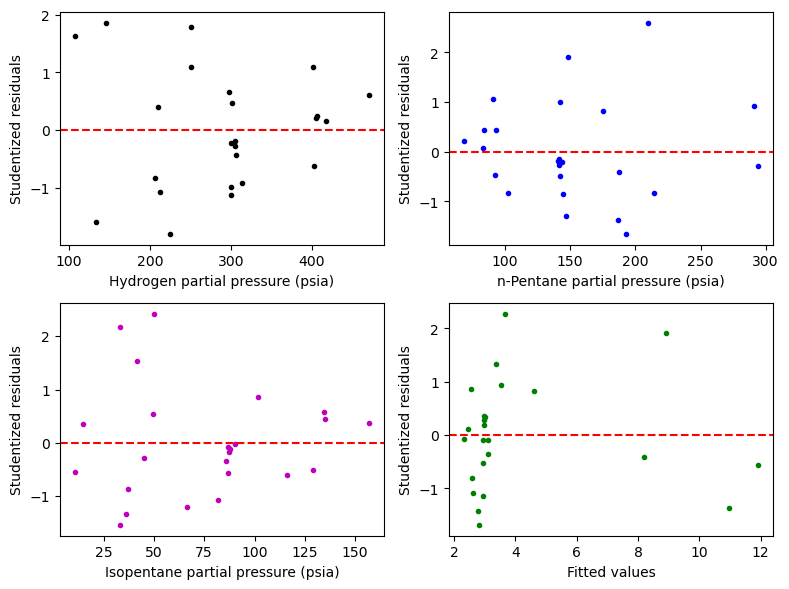

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 6))

ax[0][0].plot(df['p_hydrogen'], residual_p_hydrogen, 'k.')
ax[0][0].set_xlabel('Hydrogen partial pressure (psia)')
ax[0][0].set_ylabel('Studentized residuals')
ax[0][0].axhline(y=0, color = "r", linestyle = "--")

ax[0][1].plot(df['p_n_pentane'], residual_p_n_pentane, 'b.')
ax[0][1].set_xlabel('n-Pentane partial pressure (psia)')
ax[0][1].set_ylabel('Studentized residuals')
ax[0][1].axhline(y=0, color = "r", linestyle = "--")

ax[1][0].plot(df['isopentane'], residual_isopentane, 'm.')
ax[1][0].set_xlabel('Isopentane partial pressure (psia)')
ax[1][0].set_ylabel('Studentized residuals')
ax[1][0].axhline(y=0, color = "r", linestyle = "--")

ax[1][1].plot(best_fit, residual_fitted, 'g.')
ax[1][1].set_xlabel('Fitted values')
ax[1][1].set_ylabel('Studentized residuals')
ax[1][1].axhline(y=0, color = "r", linestyle = "--")

fig.tight_layout()

### Observations

The plots show the residuals are generally well behaved. The summary statistics suggest potential difficulties since some of the standard errors produce approximate 95% intervals which include negative values, but the parameters must be positive to be physically meaningfull. 

On the other hand, contrary to Bates and Watts calculations the correlations are not exremely high when lmfit is used however the Studentized residuals vs Fitted values plot show residuals that is not very well behaved.

### use scipy "L-BFGS-B"

In [13]:
def min_lsq(p, t, y):
    
    y_pred = calc_y(t, *p)
    z = y_pred - y

    return np.sum(z * z)

initial_values = [0.1, 0.1, 0.1, 0.1]

bnds = [(0, 30), (-1, 1), (-1, 1), (-1, 1)]

min_sol_BFGS = minimize(min_lsq,
                            initial_values,
                            args=(regressor, y_obs),
                            method="L-BFGS-B",
                            bounds = bnds)

min_sol_BFGS

      fun: 45.69873336792945
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.10542740e-06, -3.83622023e-03,  1.83320026e-04, -3.57402996e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 425
      nit: 43
     njev: 85
   status: 0
  success: True
        x: array([ 3.03125453, -0.00503679,  0.04433045, -0.09579975])